In [1]:
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TT = 0
def randomquicksort(alist,times,tmean):
   comp = [0]
   global TT
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   if (comp[0]>tmean):
      TT= TT+1
   times.append(comp[0])

In [3]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [4]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

In [5]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    tmean = 1.38*n*math.log(n, 2)
    global TT
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
          y = list(x)
          randomquicksort(y,tlist,tmean*1.5)
          
        
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    emean = np.mean(tlist)
    print("n",n)
    print("runs",runs)
    print("mean",emean)
    print("theoretical mean", tmean)
    print("deference with the  theoretical average",tmean-emean)
    print("1.5 times more than the theoretical average", TT)
    print("min",min(tlist))
    print("max",max(tlist))

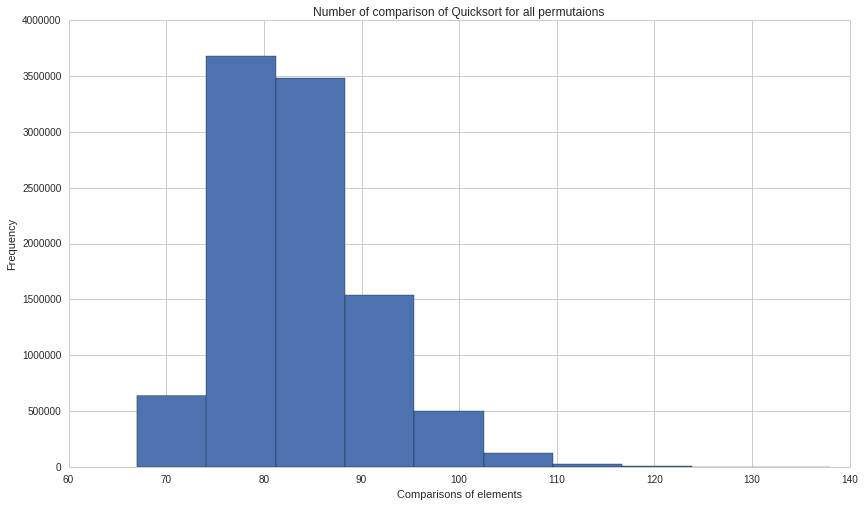

('n', 16)
('runs', 10000000)
('mean', 83.6663329)
('theoretical mean', 88.32)
('deference with the  theoretical average', 4.6536670999999927)
('1.5 times more than the theoretical average', 32)
('min', 67)
('max', 138)
('Tiempo total de ejecucion: ', 730.7696950000001)


In [6]:
TT = 0
ti =time.clock()
randomquicksorttimedistrib(16,10000000)
tf =time.clock()
print ("Tiempo total de ejecucion: ", tf-ti)